# LEVEL 3

# Task 3: Price Range vs. Online Delivery and Table Booking
    1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
    2. Determine if higher-priced restaurants are more likely to offer these services

In [2]:
# Import library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Dataset.csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# 1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

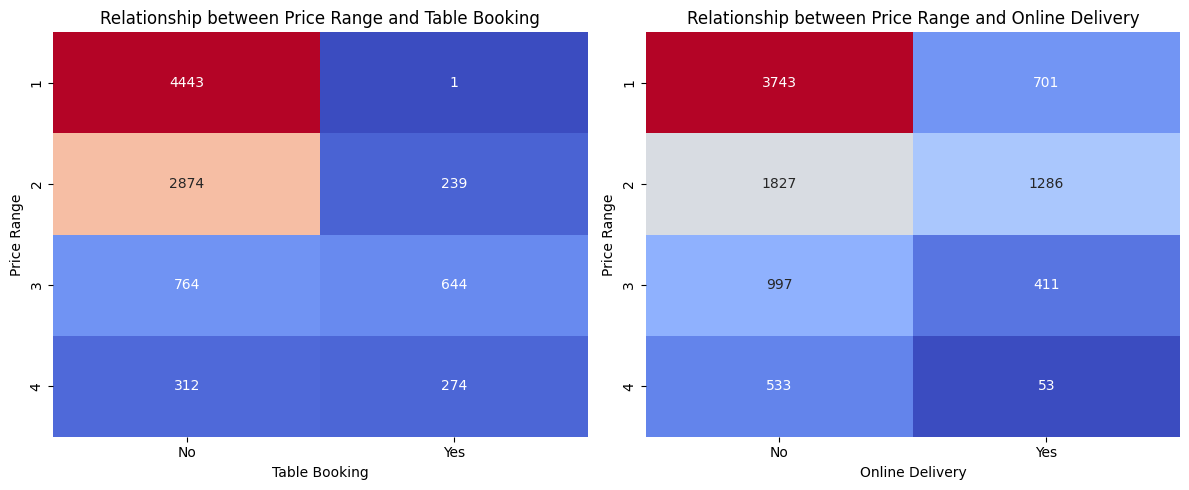

Percentage of Table Booking by Price Range:
Has Table booking         No       Yes
Price range                           
1                  46.518689  0.010470
2                  30.091090  2.502356
3                   7.999162  6.742749
4                   3.266674  2.868810 %

Percentage of Online Delivery by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    39.189614   7.339546
2                    19.128887  13.464559
3                    10.438698   4.303214
4                     5.580567   0.554916


In [13]:
# Create separate pivot tables for Table Booking and Online Delivery
pivot_table_table_booking = data.pivot_table(index='Price range', columns='Has Table booking', aggfunc='size', fill_value=0)
pivot_table_online_delivery = data.pivot_table(index='Price range', columns='Has Online delivery', aggfunc='size', fill_value=0)

# Plot heatmaps for Table Booking
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_table_booking, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Relationship between Price Range and Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Price Range')

# Plot heatmaps for Online Delivery
plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_online_delivery, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Relationship between Price Range and Online Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Price Range')

# Show the plots
plt.tight_layout()
plt.show()

# Calculate and display percentages for Table Booking
total_restaurants = data.shape[0]
table_booking_percentages = pivot_table_table_booking.div(total_restaurants) * 100
print("Percentage of Table Booking by Price Range:")
print(table_booking_percentages)

# Calculate and display percentages for Online Delivery
online_delivery_percentages = pivot_table_online_delivery.div(total_restaurants) * 100
print("\nPercentage of Online Delivery by Price Range:")
print(online_delivery_percentages)


# 2. Determine if higher-priced restaurants are more likely to offer these services

In [20]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Price range'], [data['Has Table booking'], data['Has Online delivery']])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Interpret the results
print(f"Contingency Table:")
print(contingency_table)
print("\nChi-squared statistic:", chi2)
print("P-value:", p)



Contingency Table:
Has Table booking      No        Yes     
Has Online delivery    No   Yes   No  Yes
Price range                              
1                    3743   700    0    1
2                    1711  1163  116  123
3                     624   140  373  271
4                     299    13  234   40

Chi-squared statistic: 3778.7126357124143
P-value: 0.0
